In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv(r"/content/sample_data/CAR DETAILS FROM CAR DEKHO.csv")
df1=pd.read_csv(r"/content/sample_data/CAR DETAILS FROM CAR DEKHO.csv")

In [ ]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


In [ ]:
df.isnull().sum()

,0
name,0
year,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
selling_price,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
 7   selling_price  4340 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
le=LabelEncoder()
df["name"]=le.fit_transform(df["name"])

In [ ]:
#Fuel Type
df["fuel"].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
df["fuel"]=le.fit_transform(df['fuel'])

In [ ]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,775,2007,70000,4,Individual,Manual,First Owner,60000
1,1041,2007,50000,4,Individual,Manual,First Owner,135000
2,505,2012,100000,1,Individual,Manual,First Owner,600000
3,118,2017,46000,4,Individual,Manual,First Owner,250000
4,279,2014,141000,1,Individual,Manual,Second Owner,450000


In [ ]:
#Seller Type

In [ ]:
seller_type_le=LabelEncoder()
df['seller_type']=seller_type_le.fit_transform(df['seller_type'])

In [ ]:
Transmission_le=LabelEncoder()
df['transmission']=Transmission_le.fit_transform(df['transmission'])

In [ ]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,775,2007,70000,4,1,1,First Owner,60000
1,1041,2007,50000,4,1,1,First Owner,135000
2,505,2012,100000,1,1,1,First Owner,600000
3,118,2017,46000,4,1,1,First Owner,250000
4,279,2014,141000,1,1,1,Second Owner,450000


In [ ]:
x=df.iloc[:,:-2]

In [ ]:
y=df["selling_price"]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()


In [ ]:
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [ ]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,775,2007,70000,4,1,1,First Owner,60000
1,1041,2007,50000,4,1,1,First Owner,135000
2,505,2012,100000,1,1,1,First Owner,600000
3,118,2017,46000,4,1,1,First Owner,250000
4,279,2014,141000,1,1,1,Second Owner,450000


In [ ]:
x

,name,year,km_driven,fuel,seller_type,transmission
0,0.058522,-1.445074,0.081139,1.014993,0.448192,0.339276
1,0.723520,-1.445074,-0.347689,1.014993,0.448192,0.339276
2,-0.616477,-0.258795,0.724381,-0.974051,0.448192,0.339276
3,-1.583975,0.927485,-0.433455,1.014993,0.448192,0.339276
4,-1.181476,0.215717,1.603479,-0.974051,0.448192,0.339276
...,...,...,...,...,...,...
4335,-0.373977,0.215717,0.295553,-0.974051,0.448192,0.339276
4336,-0.376477,0.215717,0.295553,-0.974051,0.448192,0.339276
4337,0.063522,-0.970563,0.359877,1.014993,0.448192,0.339276
4338,-0.926476,0.690229,0.509967,-0.974051,0.448192,0.339276


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

<Axes: >

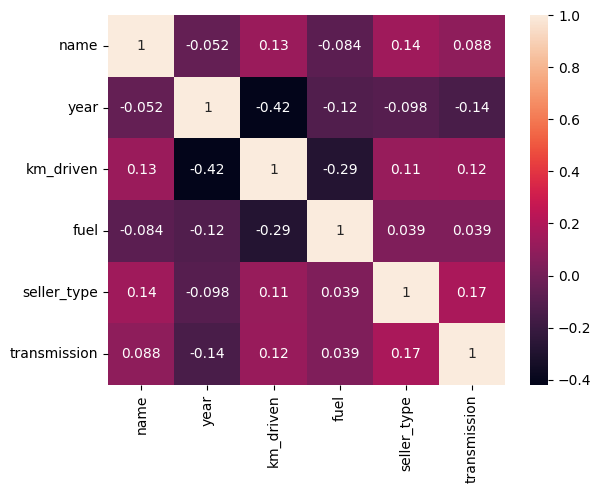

In [ ]:
sns.heatmap(data=x.corr(),annot=True)

In [ ]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)*100,rf.score(x_test,y_test)*100

(69.65542168447331, 69.65542168447331)

In [ ]:
mean_squared_error(y_test,rf.predict(x_test)),mean_absolute_error(y_test,rf.predict(x_test))

(92602636456.6444, 108644.39153340556)

In [ ]:
x_test

,name,year,km_driven,fuel,seller_type,transmission
3978,1.278519,-0.733307,0.295553,-0.974051,0.448192,0.339276
1448,1.008520,1.401997,-0.840841,1.014993,0.448192,0.339276
2664,-0.693977,-1.207818,-0.525160,1.014993,0.448192,0.339276
17,-1.181476,0.215717,1.603479,-0.974051,0.448192,0.339276
1634,-0.076478,0.690229,-0.133275,-0.974051,0.448192,-2.947457
...,...,...,...,...,...,...
3468,0.723520,-1.445074,-0.133275,1.014993,0.448192,0.339276
3164,0.226021,0.452973,1.153209,-0.974051,0.448192,0.339276
416,0.441021,-0.496051,-0.562103,-0.974051,0.448192,0.339276
1616,1.556018,0.927485,-1.280819,1.014993,2.628855,0.339276


In [ ]:
rf.predict([[1.278519,-0.733307,0.295553,-0.974051,0.448192,0.339276]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([143250.])

In [ ]:
y_test

,selling_price
3978,165000
1448,250000
2664,120000
17,450000
1634,730000
...,...
3468,130000
3164,350000
416,150000
1616,650000
